<a href="https://colab.research.google.com/github/amelliaaas/TugasTKC_282-305/blob/main/Replika_Jurnal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###RESNET50

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Covid19-dataset

/content/drive/MyDrive/Covid19-dataset


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.140
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.28
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [ ]:
!cat /proc/meminfo

MemTotal:       13302924 kB
MemFree:        10717084 kB
MemAvailable:   12468044 kB
Buffers:          120352 kB
Cached:          1781564 kB
SwapCached:            0 kB
Active:           998784 kB
Inactive:        1369848 kB
Active(anon):     430988 kB
Inactive(anon):      420 kB
Active(file):     567796 kB
Inactive(file):  1369428 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               524 kB
Writeback:             0 kB
AnonPages:        466588 kB
Mapped:           270428 kB
Shmem:              1152 kB
KReclaimable:     110420 kB
Slab:             153412 kB
SReclaimable:     110420 kB
SUnreclaim:        42992 kB
KernelStack:        5824 kB
PageTables:         6760 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651460 kB
Committed_AS:    3627976 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        8328 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
import os
import argparse
import numpy as np
from imutils import paths
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input

plt.style.use('ggplot')

In [ ]:
imagePathsTrain = list(paths.list_images("/content/drive/MyDrive/Covid19-dataset/train"))
trainX = []
trainY = []

for imagePath in imagePathsTrain:

	label = imagePath.split(os.path.sep)[-2]
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)
	trainX.append(image)
	trainY.append(label)

trainX = np.array(trainX, dtype="float32")
trainY = np.array(trainY)

lb = LabelEncoder()
trainY = lb.fit_transform(trainY)
trainY = to_categorical(trainY)

In [ ]:
imagePathsTest = list(paths.list_images("/content/drive/MyDrive/Covid19-dataset/test"))
testX = []
testY = []

for imagePath in imagePathsTest:

	label = imagePath.split(os.path.sep)[-2]
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)
	testX.append(image)
	testY.append(label)

testX = np.array(testX, dtype="float32")
testY = np.array(testY)

lb = LabelEncoder()
testY = lb.fit_transform(testY)
testY = to_categorical(testY)

In [ ]:
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.15, random_state=42, stratify=trainY)

In [ ]:
print("SHAPE OF TRAIN FEATURES: "+str(trainX.shape))
print("SHAPE OF TRAIN LABELS: "+str(trainY.shape))
print("SHAPE OF VALIDATION FEATURES: "+str(valX.shape))
print("SHAPE OF VALIDATION LABELS: "+str(valY.shape))
print("SHAPE OF TEST FEATURES: "+str(testX.shape))
print("SHAPE OF TEST LABELS: "+str(testY.shape))

SHAPE OF TRAIN FEATURES: (213, 224, 224, 3)
SHAPE OF TRAIN LABELS: (213, 3)
SHAPE OF VALIDATION FEATURES: (38, 224, 224, 3)
SHAPE OF VALIDATION LABELS: (38, 3)
SHAPE OF TEST FEATURES: (69, 224, 224, 3)
SHAPE OF TEST LABELS: (69, 4)


In [ ]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [ ]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [ ]:
baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
	layer.trainable = True

opt = Adam(lr=INIT_LR, decay=INIT_LR/EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
HR = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(valX, valY),
	validation_steps=len(valX) // BS,
	epochs=EPOCHS)

Epoch 1/20
6/6 [==============================] - 129s 20s/step - loss: 1.1029 - accuracy: 0.4972 - val_loss: 0.9273 - val_accuracy: 0.5789
Epoch 2/20
6/6 [==============================] - 122s 20s/step - loss: 0.6341 - accuracy: 0.7459 - val_loss: 0.7999 - val_accuracy: 0.5789
Epoch 3/20
6/6 [==============================] - 129s 22s/step - loss: 0.4509 - accuracy: 0.8229 - val_loss: 0.5124 - val_accuracy: 0.7632
Epoch 4/20
6/6 [==============================] - 129s 22s/step - loss: 0.3756 - accuracy: 0.8333 - val_loss: 0.4250 - val_accuracy: 0.7895
Epoch 5/20
6/6 [==============================] - 122s 20s/step - loss: 0.3016 - accuracy: 0.9061 - val_loss: 0.5701 - val_accuracy: 0.7632
Epoch 6/20
6/6 [==============================] - 121s 22s/step - loss: 0.2261 - accuracy: 0.9392 - val_loss: 0.7595 - val_accuracy: 0.7368
Epoch 7/20
6/6 [==============================] - 122s 20s/step - loss: 0.1893 - accuracy: 0.9337 - val_loss: 0.9366 - val_accuracy: 0.7105
Epoch 8/20
6/6 [====

In [ ]:
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

Accuracy = (accuracy_score(testY.argmax(axis=1),predIdxs)*100)
print('TEST ACCURACY in Percentage:', round(Accuracy,2),'%')
print("")
print("-------------------------------------------------------------------")
print("")
print("CLASSIFICATION REPORT:")
print("")
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

TEST ACCURACY in Percentage: 82.61 %

-------------------------------------------------------------------

CLASSIFICATION REPORT:

                 precision    recall  f1-score   support

          Covid       0.90      1.00      0.95        26
         Normal       0.74      1.00      0.85        20
Viral Pneumonia       0.85      0.55      0.67        20
           test       0.00      0.00      0.00         3

       accuracy                           0.83        69
      macro avg       0.62      0.64      0.62        69
   weighted avg       0.80      0.83      0.80        69



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


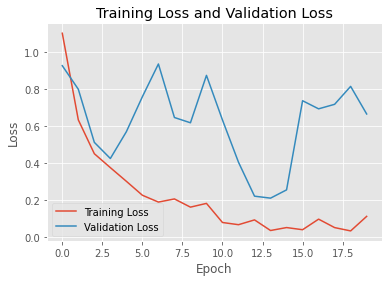

In [ ]:
N = EPOCHS

plt.figure()
plt.plot(np.arange(0, N), HR.history["loss"], label="Training Loss")
plt.plot(np.arange(0, N), HR.history["val_loss"], label="Validation Loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig("LossPlotWMF.png")

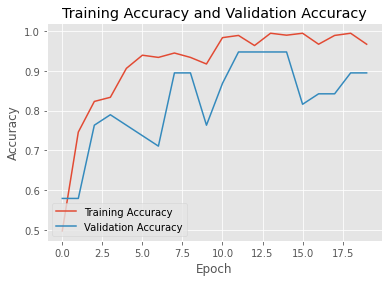

In [ ]:
plt.figure()
plt.plot(np.arange(0, N), HR.history["accuracy"], label="Training Accuracy")
plt.plot(np.arange(0, N), HR.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training Accuracy and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig("AccuracyPlotWMF.png")

###DENSENET

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import random 
import shutil
from skimage import io, transform
import math
import torch
import pandas as pd
import torchvision
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torchvision import datasets, transforms
import torch.nn.functional as F
from torchvision.utils import make_grid
import helper
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

print("using Pytorch version", torch.__version__)

using Pytorch version 1.10.0+cu111


In [ ]:
ls

AccuracyPlotWMF.png  drive/  LossPlotWMF.png  sample_data/


In [ ]:
class_names = ['Normal', 'Viral Pneumonia', 'Covid']
data_dir = '/content/drive/MyDrive/Covid19-dataset'

In [ ]:
train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
train_ds = ImageFolder(data_dir+'/train', train_transform)
test_ds = ImageFolder(data_dir+'/test', test_transform)
classes = train_ds.classes

In [ ]:
classes

['Covid', 'Normal', 'Viral Pneumonia']

Classes: 3 - ['Covid', 'Normal', 'Viral Pneumonia'] 
Examples: 251
Counts: {'Covid': 111, 'Normal': 70, 'Viral Pneumonia': 70}


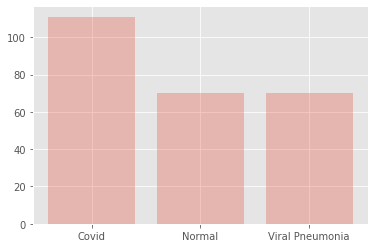

In [ ]:
def describe_dataset(data):
    classes_count = { c:0 for c in classes}
    for _,label in data:
        classes_count[classes[label]]+=1

    print(f'Classes: {len(classes)} - {classes} ')
    print(f'Examples: {len(data)}')
    print(f'Counts: {classes_count}')
    plt.bar(classes_count.keys(),classes_count.values(), alpha=0.3 )

    return classes_count

_ = describe_dataset(train_ds)


TRAIN DATASET
Classes: 3 - ['Covid', 'Normal', 'Viral Pneumonia'] 
Examples: 221
Counts: {'Covid': 97, 'Normal': 65, 'Viral Pneumonia': 59}

VALIDATION DATASET
Classes: 3 - ['Covid', 'Normal', 'Viral Pneumonia'] 
Examples: 30
Counts: {'Covid': 14, 'Normal': 5, 'Viral Pneumonia': 11}

TEST DATASET
Classes: 3 - ['Covid', 'Normal', 'Viral Pneumonia'] 
Examples: 66
Counts: {'Covid': 26, 'Normal': 20, 'Viral Pneumonia': 20}


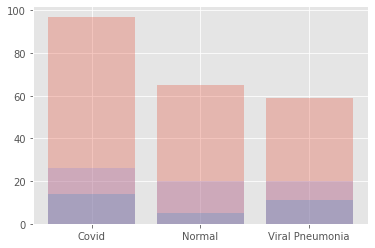

In [ ]:
from torch.utils.data import random_split
random_seed = 42
torch.manual_seed(random_seed);

val_size = 30
train_size = len(train_ds) - val_size

train_ds, val_ds = random_split(train_ds, [train_size, val_size])

print("\nTRAIN DATASET")
_=describe_dataset(train_ds)

print("\nVALIDATION DATASET")
_=describe_dataset(val_ds)

print("\nTEST DATASET")
_=describe_dataset(test_ds)

dataset = None
new_dataset = None

In [ ]:
batch_size = 5

train_loader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=3, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(val_ds, batch_size=batch_size, shuffle=True)

print('Number of training batches', len(train_loader))
print('Number of validation batches', len(valid_loader))
print('Number of test batches', len(test_loader))

Number of training batches 45
Number of validation batches 6
Number of test batches 14


In [ ]:
def change_device(input):
    if torch.cuda.is_available():
        return input.cuda()
    else:
        return input

In [ ]:
def train(model, train_loader):
    
    model.train()
    
    epoch_loss = 0

    for train_step, (images, labels) in enumerate(train_loader):

        x_train = change_device(images)
        y_train = change_device(labels)

        optimizer.zero_grad()
        
        y_pred = model(x_train)
        
        loss = loss_fn(y_pred,y_train)
        
        loss.backward()
        
        optimizer.step()

        if(train_step%20==0):
            print(f"batch:   {train_step}   train_loss   {loss.item()}   perplexity   = {torch.exp(loss)}")
        
        epoch_loss += loss.item()
        
    return epoch_loss / (train_step +1 )

In [ ]:
def evaluate(model, loader):
    
    model.eval()
    print("validation/test set evaluation")
    epoch_loss = 0
    
    with torch.no_grad():
        accuracy = 0
        for val_step, (images, labels) in enumerate(loader):
            x_train = change_device(images)
            y_train = change_device(labels)

            y_pred = model(x_train)

            loss = loss_fn(y_pred,y_train)

            _, preds = torch.max(y_pred, 1)
            accuracy += sum(( preds.cpu() == labels).numpy())

            if(val_step%3==0):
                print(f"batch:   {val_step}   validation_loss   {loss.item()}   perplexity   = {torch.exp(loss)}")
        
            epoch_loss += loss.item()
        accuracy = accuracy/len(val_ds)
        print(f' Accuracy: {accuracy:.4f}')

    return epoch_loss / (val_step + 1)

In [ ]:
class DenseNet(nn.Module):
    def __init__(self, img_channels, num_classes, num_init_features, growth_factor,layers):
        super(DenseNet,self).__init__()

        self.growth_factor = growth_factor

        self.conv1 = nn.Conv2d(in_channels=img_channels,out_channels=num_init_features,kernel_size=7,padding=3,stride=2)

        self.bn = nn.BatchNorm2d(num_init_features)

        self.relu = nn.ReLU()

        self.maxpool = nn.MaxPool2d(kernel_size=3,stride=2,padding=1)

        self.denselayer1 = self.make_layer(DenseBlock,num_init_features, layers[0])

        self.transitionlayer1 = TransitionBlock(num_init_features + self.growth_factor*layers[0])

        self.denselayer2 = self.make_layer(DenseBlock,int((num_init_features + growth_factor*layers[0])/2), layers[1])

        self.transitionlayer2 = TransitionBlock(int((num_init_features + self.growth_factor*layers[0])/2 + self.growth_factor*layers[1]))

        self.denselayer3 = self.make_layer(DenseBlock,int(((num_init_features + self.growth_factor*layers[0])/2 + self.growth_factor*layers[1])/2), layers[2])

        self.transitionlayer3 = TransitionBlock(int(((num_init_features + self.growth_factor*layers[0])/2 + self.growth_factor*layers[1])/2) + self.growth_factor*layers[2])

        self.denselayer4 = self.make_layer(DenseBlock,int((((num_init_features + self.growth_factor*layers[0])/2 + self.growth_factor*layers[1])/2 + self.growth_factor*layers[2])/2), 
                                      layers[3])

        self.averagepool = nn.AdaptiveAvgPool2d(1)

        self.fc = nn.Linear(int(num_init_features/8 + self.growth_factor*(layers[0]/8 + layers[1]/4 + layers[2]/2 + layers[3])),num_classes) #we only need to chage the output features while pre training

    def forward(self, x):
        x = self.relu(self.bn(self.conv1(x)))
        x = self.maxpool(x)
        x = self.denselayer1(x)
        x = self.transitionlayer1(x)
        x = self.denselayer2(x)
        x = self.transitionlayer2(x)
        x = self.denselayer3(x)
        x = self.transitionlayer3(x)
        x = self.denselayer4(x)
        x = self.averagepool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc(x)

        return x

    def make_layer(self, DenseBlock, features, layer):
        dense_block = []
        for i in range(layer):
            dense_block.append(DenseBlock(features + i*32,self.growth_factor))

        return nn.Sequential(*dense_block)

class DenseBlock(nn.Module):
    def __init__ (self,input_features, growth_factor):
        super(DenseBlock, self).__init__()
        self.bn1 = nn.BatchNorm2d(input_features)
        self.relu1 = nn.ReLU()
        self.conv1 = nn.Conv2d(in_channels=input_features,out_channels=4*growth_factor,kernel_size=1,stride=1)
        self.bn2 = nn.BatchNorm2d(4*growth_factor)
        self.relu2 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=4*growth_factor,out_channels=growth_factor,kernel_size=3,stride=1,padding=1)

    def forward(self, x):
        concat_layer = x.clone()
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.conv1(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.conv2(x)

        return torch.cat((concat_layer, x), dim=1)



class TransitionBlock(nn.Module):
    def __init__(self, input_features):
        super(TransitionBlock,self).__init__()
        self.bn = nn.BatchNorm2d(input_features)
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv2d(in_channels=input_features,out_channels=int(input_features/2),kernel_size=1,stride=1,padding=0)
        self.avpool = nn.AvgPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        x = self.bn(x)
        x = self.relu(x)
        x = self.conv1(x)
        x = self.avpool(x)

        return x




def DenseNet121(img_channels=3, num_classes=1000,num_init_features=64,growth_factor=32):
    return DenseNet(img_channels,num_classes, num_init_features, growth_factor,[6, 12, 24, 16])

def DenseNet161(img_channels=3, num_classes=1000,num_init_features=96,growth_factor=48):
    return DenseNet(img_channels,num_classes, num_init_features, growth_factor,[6, 12, 36, 24])

def DenseNet169(img_channels=3, num_classes=1000,num_init_features=64,growth_factor=32):
    return DenseNet(img_channels,num_classes, num_init_features, growth_factor,[6, 12, 32, 32])

def DenseNet201(img_channels=3, num_classes=1000,num_init_features=64,growth_factor=32):
    return DenseNet(img_channels,num_classes, num_init_features, growth_factor,[6, 12, 48, 32])

def DenseNet264(img_channels=3, num_classes=1000,num_init_features=64,growth_factor=32):
    return DenseNet(img_channels,num_classes, num_init_features, growth_factor,[6, 12, 64, 48])

In [ ]:
model = change_device(DenseNet121(3,3))

In [ ]:
model

DenseNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (denselayer1): Sequential(
    (0): DenseBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU()
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU()
      (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (1): DenseBlock(
      (bn1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU()
      (conv1): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1))
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_st

In [ ]:
for param in model.parameters():
    print(f' {param.size()} parameters are {param.numel()}')

 torch.Size([64, 3, 7, 7]) parameters are 9408
 torch.Size([64]) parameters are 64
 torch.Size([64]) parameters are 64
 torch.Size([64]) parameters are 64
 torch.Size([64]) parameters are 64
 torch.Size([64]) parameters are 64
 torch.Size([128, 64, 1, 1]) parameters are 8192
 torch.Size([128]) parameters are 128
 torch.Size([128]) parameters are 128
 torch.Size([128]) parameters are 128
 torch.Size([32, 128, 3, 3]) parameters are 36864
 torch.Size([32]) parameters are 32
 torch.Size([96]) parameters are 96
 torch.Size([96]) parameters are 96
 torch.Size([128, 96, 1, 1]) parameters are 12288
 torch.Size([128]) parameters are 128
 torch.Size([128]) parameters are 128
 torch.Size([128]) parameters are 128
 torch.Size([32, 128, 3, 3]) parameters are 36864
 torch.Size([32]) parameters are 32
 torch.Size([128]) parameters are 128
 torch.Size([128]) parameters are 128
 torch.Size([128, 128, 1, 1]) parameters are 16384
 torch.Size([128]) parameters are 128
 torch.Size([128]) parameters are 128

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters and total memory usage is {count_parameters(model)*(4/(2**20)*3)} mb')

The model has 6,965,123 trainable parameters and total memory usage is 79.70950698852539 mb


In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-5)

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
def show_preds(model,loader):
    model.eval() 
    print("test set evaluation")

In [ ]:
N_EPOCHS = 1

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss = train(model, train_loader)
    valid_loss = evaluate(model, valid_loader)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        print("saving the model")
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'model_1_densenet.pt')
    
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

batch:   0   train_loss   1.3227289915084839   perplexity   = 3.7536511421203613
batch:   20   train_loss   0.5216175317764282   perplexity   = 1.6847505569458008
batch:   40   train_loss   0.5792468190193176   perplexity   = 1.784693717956543
validation/test set evaluation
batch:   0   validation_loss   0.28152376413345337   perplexity   = 1.3251475095748901
batch:   3   validation_loss   0.2644594609737396   perplexity   = 1.3027266263961792
 Accuracy: 0.9333
saving the model
Epoch: 01 | Time: 2m 8s
	Train Loss: 0.552 | Train PPL:   1.736
	 Val. Loss: 0.208 |  Val. PPL:   1.231


In [ ]:
show_preds(model, test_loader)

test set evaluation


Densenet 121 pre-trained

In [ ]:
densenet121 = torchvision.models.densenet121(pretrained=True)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

In [ ]:
class DenseNet(nn.Module):
    def __init__(self, model):
        super(DenseNet, self).__init__()
        
        # get the pretrained DenseNet201 network
        self.densenet = model
        
        # disect the network to access its last convolutional layer
        self.features_conv = self.densenet.features
        
        # add the average global pool
        self.averagepool = nn.AdaptiveAvgPool2d(1)
        
        # get the classifier of the vgg19
        self.classifier = torch.nn.Linear(in_features=1024, out_features=3)
        
        # placeholder for the gradients
        self.gradients = None
    
    # hook for the gradients of the activations
    def activations_hook(self, grad):
        self.gradients = grad
        
    def forward(self, x):
        x = self.features_conv(x)
        
        # register the hook
        if x.requires_grad:
            h = x.register_hook(self.activations_hook)
        
        # don't forget the pooling
        x = self.averagepool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.classifier(x)
        return x
    
    def get_activations_gradient(self):
        return self.gradients
    
    def get_activations(self, x):
        return self.features_conv(x)

In [ ]:
model = change_device(DenseNet(densenet121))

In [ ]:
for param in model.parameters():
    print(f' {param.size()} parameters are {param.numel()}')

 torch.Size([64, 3, 7, 7]) parameters are 9408
 torch.Size([64]) parameters are 64
 torch.Size([64]) parameters are 64
 torch.Size([64]) parameters are 64
 torch.Size([64]) parameters are 64
 torch.Size([128, 64, 1, 1]) parameters are 8192
 torch.Size([128]) parameters are 128
 torch.Size([128]) parameters are 128
 torch.Size([32, 128, 3, 3]) parameters are 36864
 torch.Size([96]) parameters are 96
 torch.Size([96]) parameters are 96
 torch.Size([128, 96, 1, 1]) parameters are 12288
 torch.Size([128]) parameters are 128
 torch.Size([128]) parameters are 128
 torch.Size([32, 128, 3, 3]) parameters are 36864
 torch.Size([128]) parameters are 128
 torch.Size([128]) parameters are 128
 torch.Size([128, 128, 1, 1]) parameters are 16384
 torch.Size([128]) parameters are 128
 torch.Size([128]) parameters are 128
 torch.Size([32, 128, 3, 3]) parameters are 36864
 torch.Size([160]) parameters are 160
 torch.Size([160]) parameters are 160
 torch.Size([128, 160, 1, 1]) parameters are 20480
 torch

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters and total memory usage is {count_parameters(model)*(4/(2**20)*3)} mb')

The model has 7,981,931 trainable parameters and total memory usage is 91.34595108032227 mb


In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-5)

In [ ]:
N_EPOCHS = 1

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss = train(model, train_loader)
    valid_loss = evaluate(model, valid_loader)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        print("saving the model")
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'model_1_densenet_pretrained_cam.pt')
    
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

batch:   0   train_loss   1.0021417140960693   perplexity   = 2.7241098880767822
batch:   20   train_loss   0.9211164712905884   perplexity   = 2.5120935440063477
batch:   40   train_loss   0.3820717930793762   perplexity   = 1.4653172492980957
validation/test set evaluation
batch:   0   validation_loss   0.16525182127952576   perplexity   = 1.1796901226043701
batch:   3   validation_loss   0.3183637261390686   perplexity   = 1.3748762607574463
 Accuracy: 0.9667
saving the model
Epoch: 01 | Time: 2m 0s
	Train Loss: 0.755 | Train PPL:   2.128
	 Val. Loss: 0.238 |  Val. PPL:   1.269


In [ ]:
model.load_state_dict(torch.load('model_1_densenet_pretrained_cam.pt'))

<All keys matched successfully>

In [ ]:
show_preds(model, test_loader)

test set evaluation


Summary and Model Results evaluation

In [ ]:
import plotly.figure_factory as ff

data_matrix = [['Classes','Data_available'],
               ['Normal', 70],
               ['Viral_Pneumonia', 70],
               ['Covid', 111]]

colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]

fig = ff.create_table(data_matrix,colorscale=colorscale)
fig.update_layout(
    title_text = 'Data used for training',
    margin = {'t':40},
    height = 200,
    title_x=0.5
)
fig.show()

Accuracy Table